<a href="https://colab.research.google.com/github/PSMattingley/family-classifier/blob/master/speak_out_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

**1. Read and inspect data format**

In [61]:
path = '/content/drive/My Drive/Speak-Out'
survey = 'The Speak Out Survey v0.1.0 (Responses) - Form responses 1.csv'
survey_data = pd.read_csv(os.path.join(path, survey))
survey_data.head()

,Timestamp,Are you ready to start The Speak Out Survey?,What sector were you working in at the time you experienced harassment and bullying?,Where in the UK were you primarily working at the time you experienced the harassment and bullying?,What company were you working for when you experienced the harassment and bullying?,Did your experience involve any of the following behaviours?,Did you feel that the behaviours you experienced were associated with any of the following?,Did your experience involve any of the following behaviours? .1,What was the primary method of delivery for your harassment and bullying?,When do you first recall experiencing the harassment and bullying described?,When do you last recall experiencing the harassment and bullying described?,Who was responsible for your harassment and bullying?,What was the gender of the person responsible for your harassment and bullying?,How many other employees have been impacted by this person's behaviour? [I'm personally aware of],Did you (or someone else) make your employer aware of the unfair treatment you were receiving?,When did your employer first become formally aware of the harassment and bullying described?,Who did you make aware in the first instance?,What was the outcome of reporting?,How did reporting deliver this outcome?,How satisfied were you with how your company handled and resolved your complaint?,What factors influenced your level of satisfaction?,"If appropriate, did you report the experience to the police?",When did your employer first become informally aware of the harassment and bullying described?,"During the period of time in which you experienced unfair treatment, who else was aware that you were receiving it?",What was the outcome of reporting?.1,How did reporting deliver this outcome? .1,How satisfied were you with how your company handled and resolved your complaint?.1,What factors influenced your level of satisfaction?.1,"If appropriate, did you report the experience to the police?.1",What influenced your decision to not make your employer aware of the unfair treatment you were receiving?,"During the period of time in which you experienced unfair treatment, who else was aware that you were receiving it?.1","Did you report the experience, or part of the experience, to the police?",How did the experience impact your working life?,Did you leave the company as a direct consequence of your experience?,"What were the longer term impacts of your experience, if any?","If you are comfortable sharing, please use this section to describe your experience in your own words.",May we use your words in future materials that support the Speak Out Revolution mission?,What is your age?,How would you describe your gender?,How would you describe your sexuality?,What ethnic group best describes you?,"Are your day-to-day activities limited because of a health issue or disability which has lasted, or is expected to last, at least 12 months?",Do you regard yourself as belonging to any particular religion?,What is your current marital or relationship status?,"During the period of time in which you experienced unfair treatment, who else was aware that you were receiving it?.2",Who did you make aware in the first instance?.1,Did you enter into any contract which limits your freedom to speak out about your experience?,Did you enter into any contract which limits your freedom to speak out about your experience?.1
0,11/11/2020 15:08:16,Yes,Engineering and manufacturing,South East,AWE,"Aggressive yelling or shouting, Inappropriatel...",Your sex,Unwanted or derogatory comments (about your cl...,"Face-to-face, With witnesses present",01/06/2014,11/06/2016,A direct manager or someone else with direct a...,Male,3,Yes. A concern or complaint was informally rai...,01/03/2016,Someone in my management chain who was not my ...,Reporting led to the experience becoming worse,"I was moved roles and/or teams, I was dismisse...",3,How appropriate the resolution was,"No - However, it would

In [50]:
questions = survey_data.columns.tolist()

In [66]:
# Rename Columns
survey_data_rn = survey_data.rename(columns={'What sector were you working in at the time you experienced harassment and bullying?': 'Sector',
                            'How satisfied were you with how your company handled and resolved your complaint?': 'Resolution-Satisfaction'})

In [67]:
survey_data_rn.dtypes

Timestamp                                                                                                                                        object
Are you ready to start The Speak Out Survey?                                                                                                     object
Sector                                                                                                                                           object
Where in the UK were you primarily working at the time you experienced the harassment and bullying?                                              object
What company were you working for when you experienced the harassment and bullying?                                                              object
Did your experience involve any of the following behaviours?                                                                                     object
Did you feel that the behaviours you experienced were associated with any of the followi

In [49]:
survey_data_rn.dtypes.value_counts()

object     34
float64    12
int64       2
dtype: int64

In [70]:
# Convert time responses to datetime
survey_data_rn['Timestamp'] = pd.to_datetime(survey_data['Timestamp'])

**2. Example Plots**

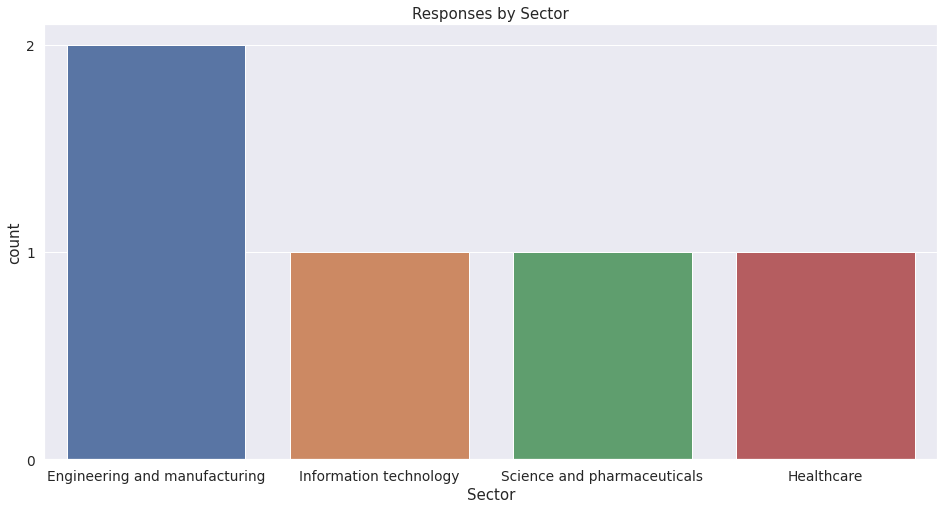

In [68]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(16,8))
title = 'Responses by Sector'
sns.set(font_scale=1.25)
p = sns.countplot(data=survey_data_rn, x="Sector")
p.set_title(title)
p.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

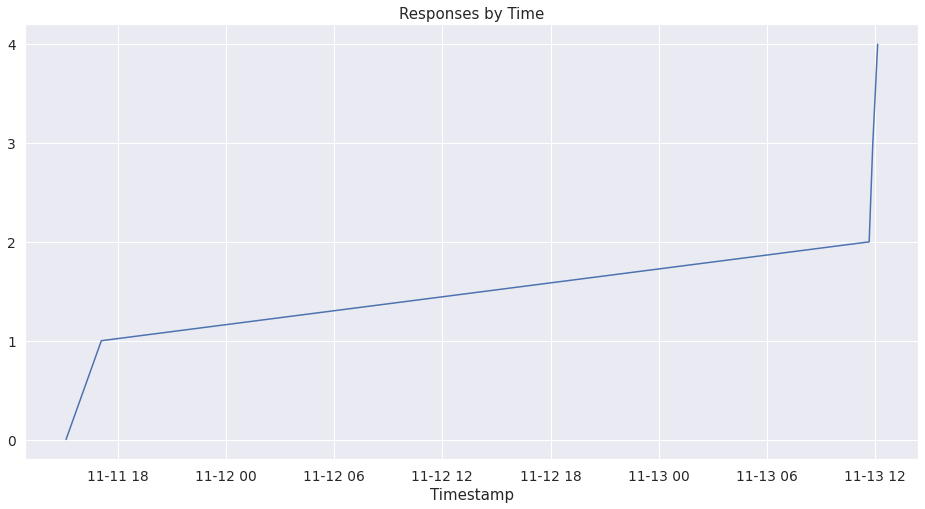

In [71]:
plt.figure(figsize=(16,8))
title = 'Responses by Time'
sns.set(font_scale=1.25)
p = sns.lineplot(x=survey_data_rn['Timestamp'], y=survey_data_rn.index)
p.set_title(title)
p.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()



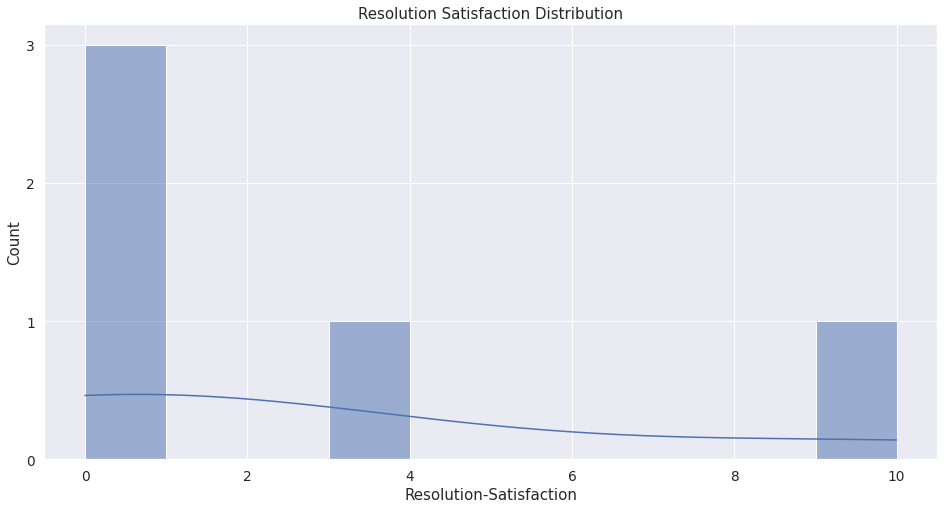

In [78]:
plt.figure(figsize=(16,8))
title = 'Resolution Satisfaction Distribution'
sns.set(font_scale=1.25)
p = sns.histplot(survey_data_rn['Resolution-Satisfaction'], kde=True, binwidth=1)
p.set_title(title)
p.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
